# 연습

## 패키지 불러오기

In [ ]:
# !conda install -c conda-forge seaborn -y

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#os: 환경설정 패키지
import os

In [2]:
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 한글 폰트 적용

In [3]:
# 사용자 운영체제 확인
import platform
platform.system()

'Windows'

In [4]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [5]:
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## Load Data

In [8]:
ds_hmeq = pd.read_csv("./Data/HMEQ_DT.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


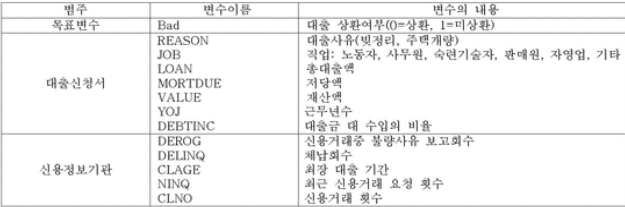

In [9]:
# 결측치 확인
ds_hmeq.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

## Preprocessing

In [10]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력 
ds_hmeq["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: ds_hmeq.mean() 각 변수별 평균 계산 후 결측치 대체
ds_hmeq.fillna(ds_hmeq.mean(), inplace=True)

In [11]:
ds_hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3748 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3748 non-null   object 
 6   YOJ      3748 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3748 non-null   float64
 9   CLAGE    3748 non-null   float64
 10  NINQ     3748 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [12]:
# random seed 고정, 매번 실행 시 같은 값을 얻음
np.random.seed(seed = 1234)

In [13]:
ds_hmeq_train = ds_hmeq.sample(frac=.7, random_state=0)
ds_hmeq_test = ds_hmeq.drop(ds_hmeq_train.index)

In [14]:
# train/test 데이터의 목표변수 설명변수 지정
ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1, inplace = False)
# train 데이터와 test 데이터 크기
print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (2624, 12)
train data Y size : (2624,)
test data X size : (1124, 12)
test data Y size : (1124,)


sklearn 을 이용한 데이터 분할

In [15]:
# 데이터 분할 함수
from sklearn.model_selection import train_test_split

ds_hmeq_y = ds_hmeq["BAD"]
ds_hmeq_x = ds_hmeq.drop("BAD", axis =1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
ds_hmeq_train_x2, ds_hmeq_test_x2, ds_hmeq_train_y2, ds_hmeq_test_y2 = \
    train_test_split(ds_hmeq_x, ds_hmeq_y, test_size=0.30, random_state = 1234)

print("train data X size : {}".format(ds_hmeq_train_x2.shape))
print("train data Y size : {}".format(ds_hmeq_train_y2.shape))
print("test data X size : {}".format(ds_hmeq_test_x2.shape))
print("test data Y size : {}".format(ds_hmeq_test_y2.shape))

train data X size : (2623, 12)
train data Y size : (2623,)
test data X size : (1125, 12)
test data Y size : (1125,)


## Model

In [17]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))

ValueError: could not convert string to float: 'HomeImp'

In [33]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성 
ds_hmeq_dummy = pd.??????(ds_hmeq)
# 더미변수 생성된 데이터의 상위 5개row를 확인
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [37]:
ds_hmeq_y = ds_hmeq_dummy["BAD"]
ds_hmeq_x = ds_hmeq_dummy.drop("BAD", axis =1, inplace = False)
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
ds_hmeq_train_x, ds_hmeq_test_x, ds_hmeq_train_y, ds_hmeq_test_y = \
    train_test_split(ds_hmeq_x, ds_hmeq_y, test_size=0.30, random_state = 1234)

print("train data X size : {}".format(ds_hmeq_train_x.shape))
print("train data Y size : {}".format(ds_hmeq_train_y.shape))
print("test data X size : {}".format(ds_hmeq_test_x.shape))
print("test data Y size : {}".format(ds_hmeq_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [38]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)
# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.932


In [41]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# 적용가능한 criterion: gini, entropy
para_criterion = ["gini", "entropy"]
# para_criterion별로 트리 모델 생성 및 정확도값 저장
for criterion in para_criterion:
    tree1 = ??????(criterion = criterion, random_state=1234)
    tree1.fit(ds_hmeq_train_x, ds_hmeq_train_y)
    train_accuracy.append(tree1.score(ds_hmeq_train_x, ds_hmeq_train_y))
    test_accuracy.append(tree1.score(ds_hmeq_test_x, ds_hmeq_test_y))
# 저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.932
1,entropy,1.0,0.936


In [42]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []
# 최대 깊이 1~10까지 순차 실행
n_iter_depth = 10
# 적용가능한 criterion: gini, entropy
list_criterion = ["gini", "entropy"]
# criterion:gini, entropy & max_depth: 1~10까지 반복 실행
for criterion in list_criterion:
    for depth in range(1, n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=1234)
        tree2.fit(ds_hmeq_train_x, ds_hmeq_train_y)

        train_accuracy.append(tree2.score(ds_hmeq_train_x, ds_hmeq_train_y))
        test_accuracy.append(tree2.score(ds_hmeq_test_x, ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [43]:
# 데이터 테이블로 저장
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.926,0.924
1,gini,2,0.931,0.927
2,gini,3,0.934,0.921
3,gini,4,0.937,0.928
4,gini,5,0.940,0.930
5,gini,6,0.941,0.930
6,gini,7,0.947,0.935
7,gini,8,0.951,0.933
8,gini,9,0.957,0.933
9,gini,10,0.960,0.938


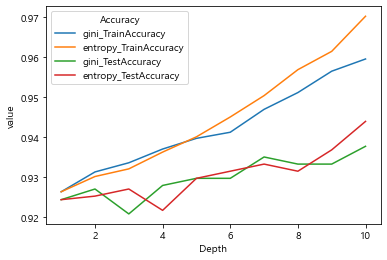

In [51]:
# 정확도를 그래프로 표현
ds_accuracy2_melt = pd.??????(ds_accuracy2, id_vars=["Criterion", "Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"] + "_" + ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth", y="value", hue="Accuracy", data=ds_accuracy2_melt);

In [54]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []; para_min_leaf_size = []
# 최대 깊이 10
max_depth = 10
# 잎사귀 수 10~50까지 10단위로 순차 실행
list_min_leaf_size = [i*10 for i in range(1, 6)]
# criterion:gini, entropy & min_sample_size: 10~50까지 반복 실행
for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, min_samples_leaf = leafsize, random_state=1234)
        tree3.fit(ds_hmeq_train_x, ds_hmeq_train_y)
        train_accuracy.append(tree3.score(ds_hmeq_train_x, ds_hmeq_train_y))
        test_accuracy.append(tree3.score(ds_hmeq_test_x, ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [55]:
# 데이터 테이블로 저장
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.947,0.925
1,gini,10,20,0.934,0.920
2,gini,10,30,0.930,0.925
3,gini,10,40,0.926,0.924
4,gini,10,50,0.926,0.924
5,entropy,10,10,0.944,0.924
6,entropy,10,20,0.932,0.923
7,entropy,10,30,0.930,0.925
8,entropy,10,40,0.926,0.924
9,entropy,10,50,0.926,0.924


<AxesSubplot:xlabel='MinLeafSize', ylabel='value'>

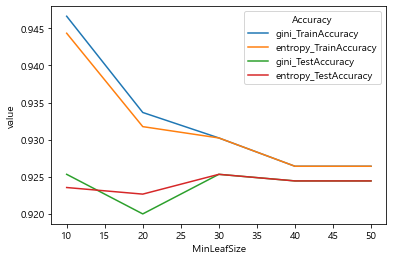

In [56]:
# 정확도를 그래프로 표현
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars=["Criterion", "Depth", "MinLeafSize"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=ds_accuracy3_melt);

## Visualization

In [93]:
# 트리 모델 생성 gini, depth=4 로 모델 생성
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf= 50, random_state = 1234)

# 트리 모델 training
tree.fit(ds_hmeq_train_x, ds_hmeq_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=1234)

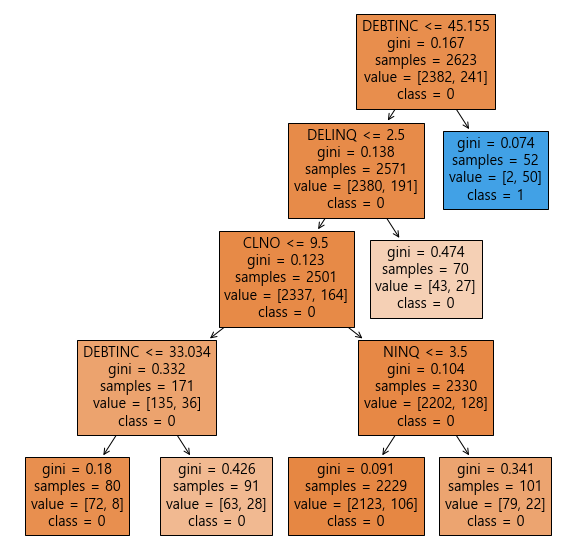

In [121]:
fig, axes = plt.??????(nrows = 1,ncols = 1, figsize = (10,10))
plot_tree(tree,
                   feature_names=ds_hmeq_train_x.columns,  
                   class_names='01',
                   ??????=True);
# fig.savefig('대출자 채무상환 모델.png')

부모 노드: 부모 노드에서 부채비율 45.155보다 작거나 같으면 True 크면 False로 분류된다.  
(이후 모든 노드에 대해 True, False의 방향이 동일하게 적용된다)

파란색 리프노드: 부모 노드의 조건을 역순으로 조합해서 해석할 수 있다.(부모노드에서 해석하면 됨)   
총 sample수는 52개이고, 음성(상환)으로 잘못 분류된 케이스는 2개이고, 50개를 양성(미상환)으로 잘 분류했다  
(분류 예측) 부채비율  45.155보다 큰 경우 모델은 예측을 양성(미상환)으로 분류한다.  

## 결론 도출

In [122]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = ds_hmeq_train_x.columns
ds_feature_importance["Importance"] = tree.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance.sort_values("Importance", ascending=False).round(3)

,Feature,Importance
9,DEBTINC,0.755
5,DELINQ,0.126
8,CLNO,0.069
7,NINQ,0.050
11,REASON_HomeImp,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000
13,JOB_Office,0.000
12,JOB_Mgr,0.000


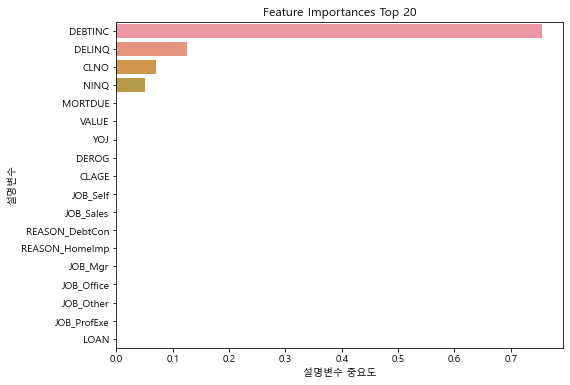

In [156]:
# 설명변수 중요도 그래프 함수 정의
def plot_feature_importances(model):
    feature_importance_values = tree.feature_importances_
    # Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
    feature_importances = pd.Series(feature_importance_values, index=ds_hmeq_train_x.columns)
    # 중요도값 순으로 Series를 정렬
    feature_top20 = feature_importances.sort_values(ascending=False)[:20]

    plt.figure(figsize=[8, 6])
    plt.title('Feature Importances Top 20')
    sns.barplot(x=feature_top20, y=feature_top20.??????)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.show()
    
# 설명변수 중요도 그래프 함수 실행
plot_feature_importances(tree)

# 실습

## Load Data

In [125]:
"Data/통신고객이탈.CSV"

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


## Preprocessing

CHURN 컬럼의 0을 Active, 1을 Churned로 바꿔라

더미 변수 생성

In [128]:
# random seed 고정 매번 실행 시 같은 값을 얻음
np.random.seed(seed = 1234)

In [129]:
ds_churn_x = ds_churn_dummy.copy()
ds_churn_y = ds_churn["CHURN"]

train test

In [131]:
# train 데이터와 test 데이터 크기
print("train data X size : {}".format(ds_churn_train_x.shape))
print("train data Y size : {}".format(ds_churn_train_y.shape))
print("test data X size : {}".format(ds_churn_test_x.shape))
print("test data Y size : {}".format(ds_churn_test_y.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data Y size : (279,)


## Model

In [132]:
#일단 한 번 해봐

Accucary on training set: 1.000
Accucary on test set: 0.853


In [ ]:
#criterion을 바꿔서 보자

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.853
1,entropy,1.0,0.832


In [134]:
#depth도 바꿔서 보자

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.839,0.860
1,gini,2,0.866,0.889
2,gini,3,0.889,0.910
3,gini,4,0.892,0.910
4,gini,5,0.920,0.903
5,gini,6,0.931,0.875
6,gini,7,0.951,0.860
7,gini,8,0.959,0.842
8,gini,9,0.963,0.853
9,gini,10,0.972,0.857


<AxesSubplot:xlabel='Depth', ylabel='value'>

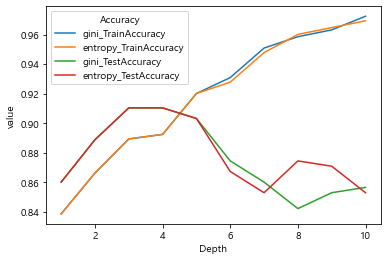

In [135]:
# 정확도를 그래프로 표현

criterion = Gini, depth = 3

In [136]:
# 잎사귀 수 10~50까지 10단위로 순차 실행

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,3,10,0.885,0.914
1,gini,3,20,0.885,0.914
2,gini,3,30,0.848,0.871
3,gini,3,40,0.848,0.871
4,gini,3,50,0.794,0.821
5,entropy,3,10,0.885,0.914
6,entropy,3,20,0.885,0.914
7,entropy,3,30,0.848,0.871
8,entropy,3,40,0.848,0.871
9,entropy,3,50,0.791,0.842


<AxesSubplot:xlabel='MinLeafSize', ylabel='value'>

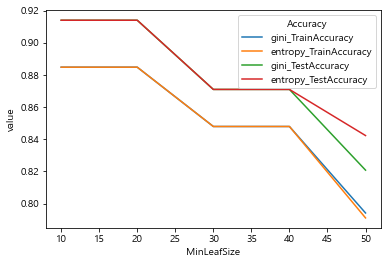

In [137]:
# 정확도를 그래프로 표현


min_samples_leaf = 20

In [140]:
# 트리 모델 생성 gini, depth=3, min_samples_leaf=20 로 모델 생성

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=1234)

In [141]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
# ds_feature_importance의 테이블을 중요도별로 정렬

,Feature,Importance
17,HANDSET_ASAD90,0.465
2,DROPPED_CALLS,0.302
20,HANDSET_CAS30,0.225
0,AGE,0.007
24,HANDSET_SOP10,0.000
19,HANDSET_BS210,0.000
21,HANDSET_CAS60,0.000
22,HANDSET_S50,0.000
23,HANDSET_S80,0.000
26,HANDSET_WC95,0.000


## Visualization

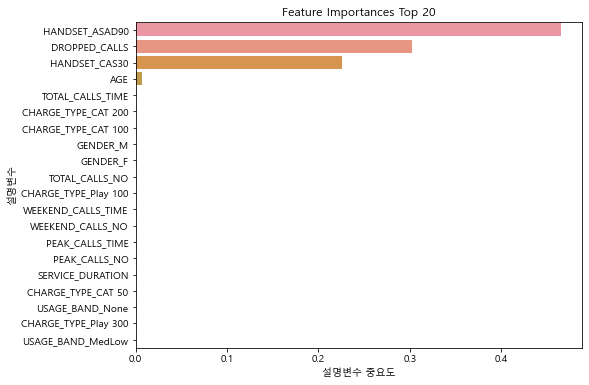

In [159]:
# 설명변수 중요도 그래프 함수 실행
plot_feature_importances(tree_final)